# Задание со звездочкой

<pre>
ФИО: Никифоров Владимир
</pre>

In [1]:
import pandas as pd
import scipy.stats as sts
from scipy.stats import mannwhitneyu

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../data/Статистика_за_2018_год__1_.csv', encoding='windows-1251')
df.head()

,Число бракованных листов,Скорость прокатки,Марка стали
0,3,3.8,A
1,3,3.8,B
2,3,4.8,B
3,4,4.4,B
4,6,5.0,B


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 3 columns):
Число бракованных листов    237 non-null int64
Скорость прокатки           237 non-null float64
Марка стали                 237 non-null object
dtypes: float64(1), int64(1), object(1)
memory usage: 5.7+ KB


In [4]:
df.describe()

,Число бракованных листов,Скорость прокатки
count,237.000000,237.000000
mean,3.257384,4.509705
std,1.807821,0.696260
min,0.000000,2.500000
25%,2.000000,4.100000
50%,3.000000,4.600000
75%,4.000000,5.000000
max,8.000000,6.500000


In [5]:
df['more_than_3'] = df['Число бракованных листов'].apply(lambda x: 1 if x > 3 else 0)
df.head()

,Число бракованных листов,Скорость прокатки,Марка стали,more_than_3
0,3,3.8,A,0
1,3,3.8,B,0
2,3,4.8,B,0
3,4,4.4,B,1
4,6,5.0,B,1


In [6]:
# получим данные по партиям для стали марок А и В
df_a = df[df['Марка стали']=='A']
print(f'Count of examples A = {df_a.shape[0]}')
df_b = df[df['Марка стали']=='B']
print(f'Count of examples B = {df_b.shape[0]}')

Count of examples A = 139
Count of examples B = 98


In [7]:
# приравняем количество измерений первой выборки ко второй (марка стали А и В)
df_a = df_a.iloc[:len(df_b)]

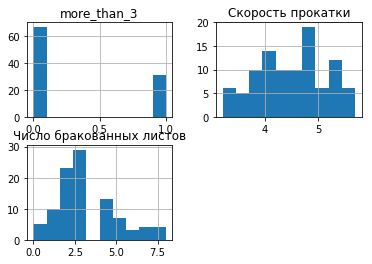

In [8]:
# распределения данных по марке А
df_a.hist();

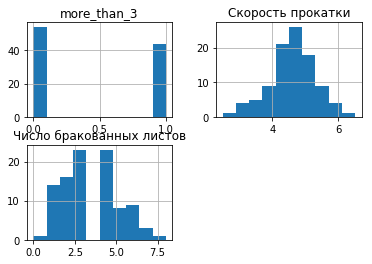

In [9]:
# распределения данных по марке В
df_b.hist();

### Проверим, что "Более 3 бракованных листов на партию выходит значимо чаще для стали марки А, чем для стали марки B."

In [10]:
df_a_more_than_3 = df_a['more_than_3'].values
print(df_a_more_than_3)
df_b_more_than_3 = df_b['more_than_3'].values
print(df_b_more_than_3)

[0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0
 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1]
[0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0
 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0]


In [11]:
print(df_a_more_than_3.mean())
print(df_b_more_than_3.mean())

0.3163265306122449
0.4489795918367347


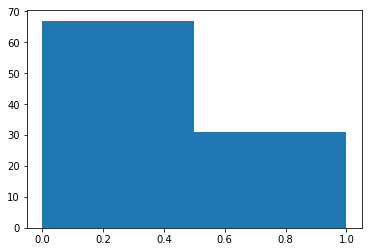

In [15]:
plt.hist(df_a_more_than_3, bins=df['more_than_3'].max()+1);

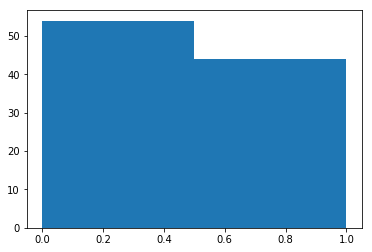

In [16]:
plt.hist(df_b_more_than_3, bins=df['more_than_3'].max()+1);

In [13]:
sts.ttest_ind(df_a_more_than_3, df_b_more_than_3)

Ttest_indResult(statistic=-1.9186814283602933, pvalue=0.05649260475471848)

In [14]:
mannwhitneyu(df_a_more_than_3, df_b_more_than_3)

MannwhitneyuResult(statistic=4165.0, pvalue=0.0284467072867045)